# 29 Nov 22 Monte Carlo Integration

A useful approach to making models of systems is using randomness to find solutions to problems that are stable or static. One such approach is called [Monte Carlo integration](https://en.wikipedia.org/wiki/Monte_Carlo_integration) that can be used to find particularly problematic integrals. It's a useful pedagogical introduction to what we are attempting to do, use [Monte Carlo approaches](https://en.wikipedia.org/wiki/Monte_Carlo_method) to model thermodynamical systems using the [Metropolis-Hastings algorithm](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as random
%matplotlib inline

## Finding Pi

This is a classic use of Monte Carlo integration that illustrates many of the concepts of the technique. Effectively, we can assume there's a constant (undetermined) that links that the area of a circle and the radius squared. 

$$A_{circle} = c r^2$$

We assume it's radius squared as a test because we know that boxes go like length times width and a sqaure with side length $r$ has:

$$A_{square} = r^2$$

Thus the ratio of the area of the circle to the area of the sqaure would give the constant!

$$\dfrac{A_{circle}}{A_{square}} = \dfrac{c r^2}{r^2} = c$$

This is true for any radius $r$, so we choose $r=1$. We also notice that we can solve this problem in one quadrant and multiple by four.  So let's graph that.

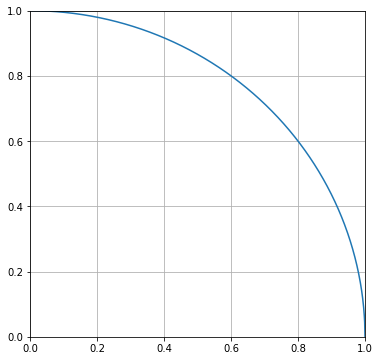

In [2]:
step = 0.001
x = np.arange(0,1+step,step)
y = np.sqrt(1-x**2)

plt.figure(figsize=(6,6))

plt.plot(x,y)

plt.axis([0, 1, 0, 1])
plt.grid()


### The Drop Algorithm

The concept behind this is watching rain hit the ground and counting the droplets inside and outside a circle. We can simulate this with random drops in the range from 0 to 1 in $x$ and $y$. Let's start with 500 drops. We plot the drops below.

In [3]:
ndrops = 500
drops = np.zeros([ndrops,2])

for i in range(ndrops):
    
    xrand = random.random()
    yrand = random.random()
    
    drops[i] = xrand,yrand

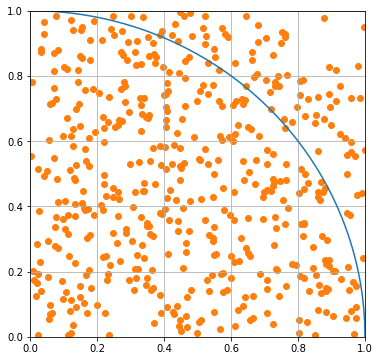

In [4]:
plt.figure(figsize=(6,6))

plt.plot(x,y)

plt.scatter(drops[:,0],drops[:,1], c='C1')

plt.axis([0, 1, 0, 1])
plt.grid()

Notice that some of the drops are outside the curve and some are inside. We can use the formula for a circle of radius 1 to find which are which. 

$$x^2 + y^2 = 1$$

If this produce is below 1, the drop is inside the curve; otherwise it's outside. The statement below forms a binary filter. You might have seen something like this before in CMSE 201. We can use those filters on the arrays are replot to confirm. The use of of the tilde (~) reverses the filter (true becomes false and vice versa).

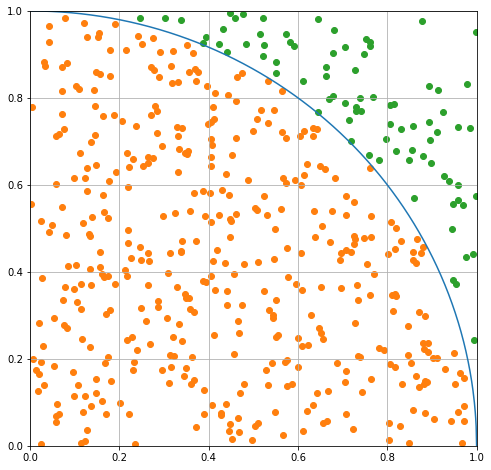

In [5]:
insideCurve = drops[:,0]**2+drops[:,1]**2 < 1

plt.figure(figsize=(8,8))

plt.plot(x, y, label='circle')

plt.scatter(drops[insideCurve,0],drops[insideCurve,1], c='C1', label='inside')
plt.scatter(drops[~insideCurve,0],drops[~insideCurve,1], c='C2', label='outside')

plt.axis([0, 1, 0, 1])
plt.grid()

### Computing Pi

We assumed our approach would bear out a constant.

$$c=\dfrac{A_{circle}}{A_{square}}$$

We can compute an estimate of it using the number of drops, which are proxies for the area of a quarter circle.

$$c \approx 4\dfrac{N_{inside}}{N}$$

Our estimate is below.

In [6]:
pi_estimate = 4*len(drops[insideCurve])/len(drops)
print(pi_estimate)

3.344


## Seeking Convergence

So the estimate was probably not great. But we can make it better by choosing more drops. So rewrite this approach a function where you can send the number of drops in and return the estimate of pi. Then use it to plot this estimate over many choices of N. Show what the value converges to.

In [7]:
## your code here

## Finding the values of integrals

So that was a cool trick, but the power of this form of Monte Carlo is being able to compute very difficult integrals. It's not efficient as other integrators, but it's sometimes the only choice.

### Integrating sine

Using the same approach as before where we take the proportion of drops 'under the curve' compared to all drops, find the integral of $sin(x)$ over one interval. 

* Find the number of drops needed to make a reasonable estimate.
* Use the long term behavior (plot it?) to estimate the value and uncertainty in the integral

In [8]:
## your code here

### A Pathologically Terrible Integral

Consider the function below over the interval from 0 to 2.

$$y = \sin^2\left[\dfrac{1}{x(2-x)}\right]$$ 

Let's plot this son of gun.

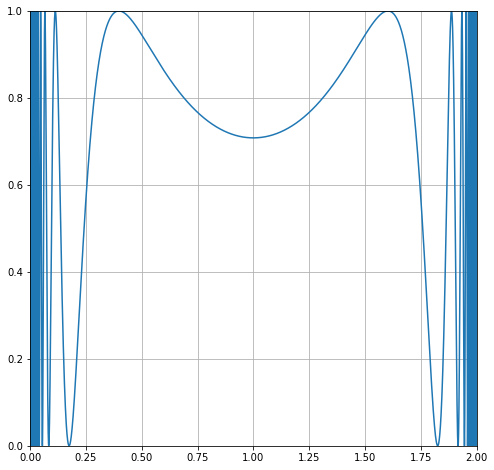

In [9]:
x = np.arange(0.00001,2,0.00001)
y = np.sin(1/(x*(2-x)))**2

plt.figure(figsize=(8,8))
plt.plot(x,y)
plt.axis([0, 2, 0, 1])
plt.grid()

Let's zoom in on one of the wings, and we can see the problem. The integral varies wildly!

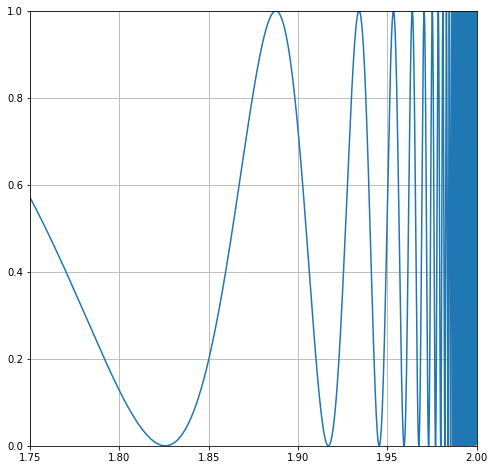

In [10]:
x = np.arange(0.00001,2,0.00001)
y = np.sin(1/(x*(2-x)))**2

plt.figure(figsize=(8,8))
plt.plot(x,y)
plt.axis([1.75, 2, 0, 1])
plt.grid()

## Bring in Monte Carlo

Following the same approach estimate the value of the integral for this function and the uncertainty in your estimate.

In [11]:
## your code here